In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sklearn functions and models
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef


In [6]:
data = pd.read_csv('../data_processed/data_final_aggregates.csv')
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
display(data)

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,canada,new_zealand,ireland,uk,usa,male,female,depr_add_aggr,hall_add_aggr,stim_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,1,0,0,1,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,0,0,1,0,1,0,0,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,0,0,1,0,1,0,1,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,0,1,0,0,1,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,0,0,0,1,0,1,1,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,0,0,1,1,0,0,2,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,0,0,0,1,0,1,2,1,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,0,0,0,0,1,0,1,1,2,1


In [7]:
substances = ['alcohol','anphet', 'amyl', 'benzo', 'caffeine', 'cannabis', 
              'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroine', 'ketamine', 
              'legal_h', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa', 'male']
data.drop(columns=substances, inplace=True, axis=1)
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,asian,...,australia,canada,new_zealand,ireland,uk,usa,female,depr_add_aggr,hall_add_aggr,stim_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,...,0,0,0,0,1,0,1,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,...,0,0,0,0,1,0,0,0,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,...,0,0,0,0,1,0,0,1,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,...,0,0,0,0,1,0,1,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,...,0,0,0,0,0,1,1,1,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,...,0,0,0,0,0,1,0,0,2,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,...,0,0,0,0,0,1,1,2,1,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0,...,0,0,0,0,0,1,1,1,2,1


Text(0.5, 1.0, 'Stimulants mutual information')

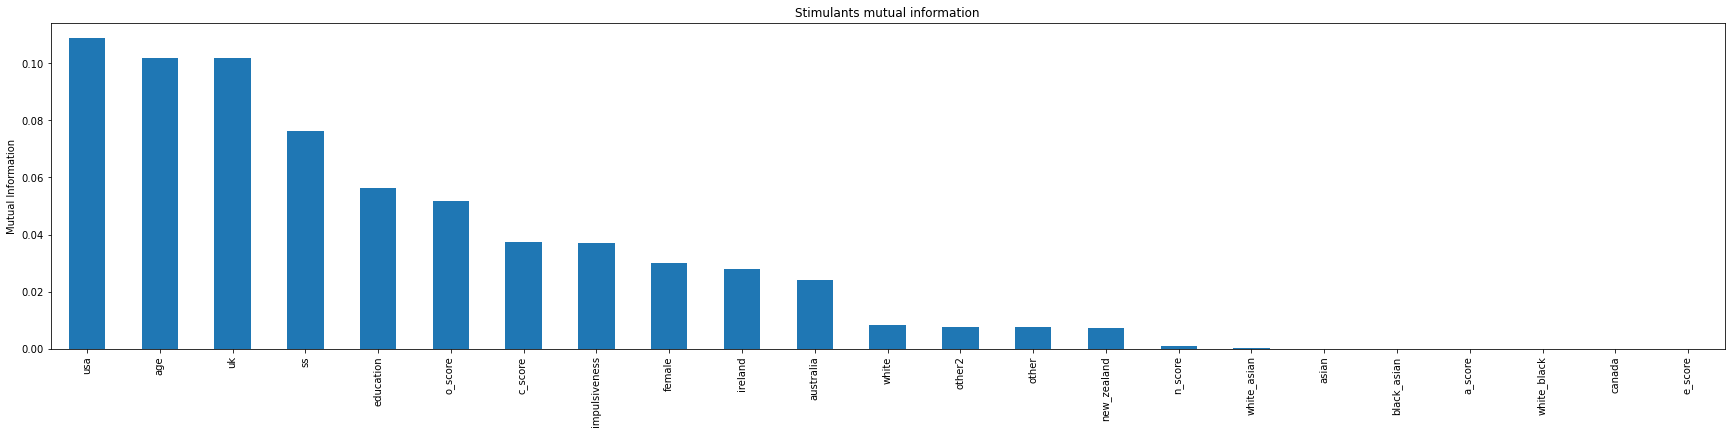

In [58]:
# where more information is stored (I think, does someone know it better?)

data['stim_add_aggr'].replace(2,1, inplace = True) #just 2 classes not three
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                                                    data['stim_add_aggr'], test_size=0.25, random_state=0)

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(30, 6))
plt.ylabel('Mutual Information')
plt.title('Stimulants mutual information')

## Balance class

In [25]:
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

0    868
1    868
Name: stim_add_aggr, dtype: int64

# Logistic regression

MCC score: 0.5269201258871922


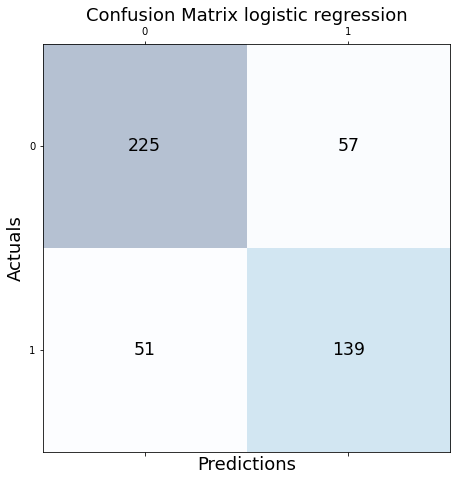

In [26]:
#training 
model = LogisticRegression(random_state = 0, max_iter=10000)
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)
acc1 = matthews_corrcoef(y_test, y_pred)
print(f"MCC score: {acc1}")

cm1 = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix logistic regression', fontsize=18)
plt.show()
#fig.savefig('../img/confusion_matrix_stim_log_reg.png') just for the mid term report

In [15]:
display(X_test)
X_train

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,asian,...,other,white,other2,australia,canada,new_zealand,ireland,uk,usa,female
220,-0.95197,0.45468,0.82562,-0.30033,0.29338,-0.01729,0.12331,0.19268,0.07987,0,...,0,1,0,0,0,0,0,1,0,1
506,-0.07854,0.45468,0.13606,-0.30033,-0.97631,-1.34289,-0.00665,0.19268,-0.52593,0,...,0,1,0,0,0,0,0,1,0,0
1758,0.49788,-0.05921,-0.24649,-0.57545,-0.17779,-0.30172,0.75830,0.88113,0.40148,0,...,0,1,0,0,0,0,0,1,0,1
1678,1.09449,-0.61113,-0.24649,1.58487,-0.84732,1.28610,0.58489,-0.71126,-0.84637,0,...,0,1,0,0,0,0,0,1,0,1
76,1.09449,-1.43719,-0.34799,-0.69509,-1.55521,0.43852,0.58489,-2.55524,-2.07848,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,-0.07854,1.16365,-0.05188,-1.37639,0.44585,-0.45321,-0.52745,0.19268,0.76540,0,...,1,1,0,0,0,0,0,0,0,0
231,2.59171,1.16365,0.13606,-1.09207,-0.45174,-0.45321,0.25953,-0.21712,-1.54858,0,...,0,1,0,0,0,0,0,1,0,1
1353,-0.07854,-0.61113,-1.69163,0.63779,0.58331,-0.01729,0.58489,0.88113,0.40148,0,...,1,1,0,0,0,0,0,0,0,0
1409,-0.07854,1.16365,1.02119,0.80523,1.24033,-0.01729,0.25953,-1.37983,0.07987,0,...,0,1,0,0,0,0,0,1,0,1


,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,asian,...,other,white,other2,australia,canada,new_zealand,ireland,uk,usa,female
0,-0.951970,-0.611130,1.132810,-1.633400,-0.019280,-1.075330,-1.014500,0.192680,0.765400,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.951970,-0.611130,-1.328280,0.167670,0.723300,-1.212130,-1.518400,-0.711260,0.765400,0,...,1,1,0,0,0,0,0,0,0,1
2,-0.951970,-1.227510,-0.678250,-0.300330,-1.119020,-0.760960,-1.518400,0.881130,-0.215750,0,...,0,1,0,0,0,0,0,0,1,0
3,-0.951970,-0.611130,-0.246490,0.962480,0.723300,0.287830,-0.276070,0.529750,0.079870,0,...,0,0,0,0,0,0,0,1,0,1
4,-0.078540,-2.435910,0.629670,0.003320,1.240330,1.818660,0.939490,1.862030,1.921730,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,-0.951970,-0.536513,0.973396,-0.601334,0.126956,-0.515911,-1.606401,0.936706,0.450681,0,...,0,1,0,0,0,0,0,0,1,0
2417,-0.078540,0.402631,-1.684752,1.327165,1.222884,0.124101,1.124568,0.493277,1.847489,0,...,0,1,0,0,0,0,0,0,0,0
2418,1.014798,1.780042,0.187089,-0.775334,-0.284452,-0.095971,-1.716332,-0.800564,-2.078480,0,...,0,1,0,0,0,0,0,0,0,0
2419,-0.951970,-0.973671,0.786185,0.771505,-0.712191,-1.759341,-1.335397,1.292210,1.511753,0,...,0,1,0,0,0,0,0,0,1,0


In [31]:
cv = KFold(n_splits=6, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                         data['stim_add_aggr'], scoring='f1', cv=cv, n_jobs=-1)


print('F1: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

F1: 0.710 (0.029)


# SVM

SVM method: linear 

MCC linear is: 0.5328582750656077


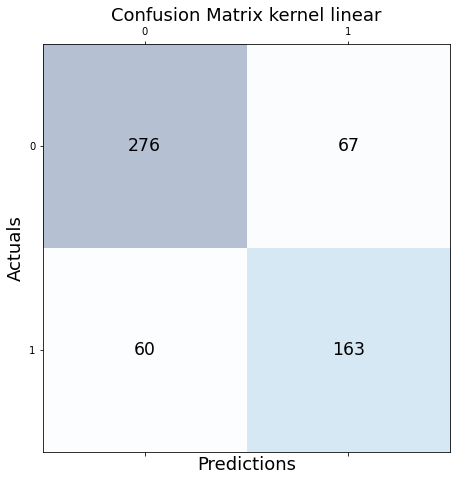

F1 K-Fold: 0.720 (0.015)


SVM method: poly 

MCC poly is: 0.4840186771602593


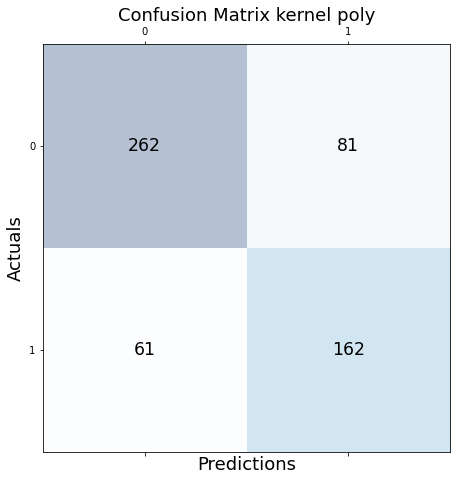

F1 K-Fold: 0.678 (0.007)


SVM method: rbf 

MCC rbf is: 0.5042937211762802


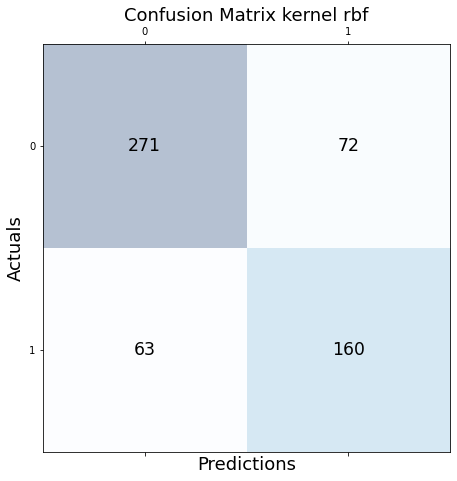

F1 K-Fold: 0.718 (0.010)


SVM method: sigmoid 

MCC sigmoid is: 0.42651661858928597


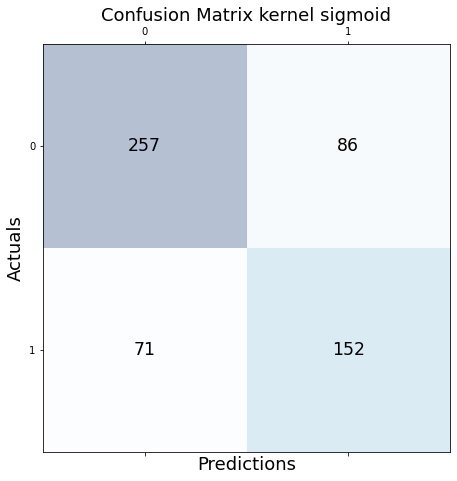

F1 K-Fold: 0.622 (0.031)




In [64]:
from sklearn.svm import SVC

for kern in ['linear', 'poly', 'rbf', 'sigmoid']: #try all different Kernel method
    print(f'SVM method: {kern} \n')
    title = 'Confusion Matrix kernel ' + kern
    model = SVC(kernel = kern, random_state = 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MCC = matthews_corrcoef(y_test, y_pred)
    print(f"MCC {kern} is: {MCC}")
    #spec1 = specificity(y_test, y_pred)
    #print(f"Specificity score: {spec1}") #not sure it is correct
    cm1 = confusion_matrix(y_test, y_pred) 
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm1.shape[0]):
        for j in range(cm1.shape[1]):
            ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(title , fontsize=18)
    plt.show() #doesn't work boh
    
    cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
    scores = cross_val_score(model, data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                         data['stim_add_aggr'], scoring='f1', cv=cv, n_jobs=-1)

    # report performance
    print('F1 K-Fold: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
    print('\n')

#  K-Neighboors Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

#it stopped word bohhh. It isn't working with categories, change to int

# facoultative: create a function to convert categories to number
#smart solution: re run the functio hahahha :)   
    
model = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print(y_train)
MCC3 = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {MCC3}")

#no k-folding (is it necessary?) I have done it, it's crap

MCC: 0.4750390117008761


In [66]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                         data['stim_add_aggr'], scoring='f1', cv=cv, n_jobs=-1)
# report performance
print('F1 K-neigh: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

F1 K-neigh: 0.704 (0.015)


# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MCC4 = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {MCC4}")



MCC: 0.44994051243170113


In [40]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                         data['stim_add_aggr'], scoring='f1', cv=cv, n_jobs=-1)
# report performance
print('F1 Decision Tree: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

F1 Decision Tree: 0.612 (0.014)


# XGboost

In [70]:
import xgboost as xgb

C:\Users\Francesca\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


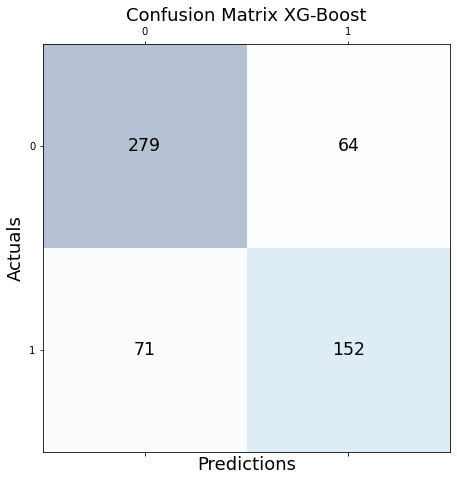

N train : 1614; N test : 566
MCC5: 0.49792748808667625
Running time: 0.5452780723571777


In [71]:
import time

tic = time.time()

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                                                   data['stim_add_aggr'], test_size=0.3, random_state=0)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

title = 'Confusion Matrix XG-Boost'    
    
#X_train = data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis = 1)[:1319]
#y_train = data['stim_add_aggr'][:1319].tolist()

xgb_model.fit(X_train,y_train)

#X_test = data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis = 1)[1319:]
#y_test = data['stim_add_aggr'][1319:].tolist()

y_pred = xgb_model.predict(X_test)

#print(y_train)
cm1 = confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(title , fontsize=18)
plt.show() #doesn't work boh

print(f'N train : {len(X_train)}; N test : {len(X_test)}')


MCC5 = matthews_corrcoef(y_test, y_pred)
print(f"MCC5: {MCC5}")
#print(f"MCC: {MCC_xg}")

tac = time.time()

running_time = tac-tic

print(f'Running time: {running_time}')

In [72]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(xgb_model.fit(X_train,y_train), data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                         data['stim_add_aggr'], scoring='f1', cv=cv, n_jobs=-1)
# report performance
print('F1 XG Boost: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

C:\Users\Francesca\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 XG Boost: 0.681 (0.024)


# Random forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

# rerun after XG-Boost
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis=1), 
                                                    data['stim_add_aggr'], test_size=0.3, random_state=0)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
#y_train.value_counts()

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

y_pred_cont = rf.predict(X_test)

y_pred = [1 if i>0.5 else 0 for i in y_pred_cont] #convert to discrete variable 0.6 get the best acuracy

MCC6: 0.5364574783908126


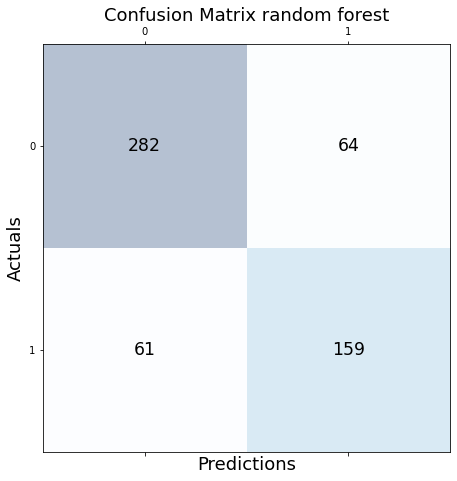

In [75]:
MCC6 = matthews_corrcoef(y_test, y_pred)
print(f"MCC6: {MCC6}")
spec1=9


cm1 = confusion_matrix(y_pred, y_test)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix random forest', fontsize=18)
plt.show()